<a href="https://colab.research.google.com/github/RajXcoder-web/UNET_Brain_segmentation/blob/main/Unet_utilisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, Model

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Brain/unet_trained.h5')

In [26]:
def test_image_with_path(model, img_path, img_size=128):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Error reading:", img_path)
        return

    img_resized = cv2.resize(img, (img_size, img_size))
    img_norm = img_resized.astype('float32') / 255.0

    input_img = np.expand_dims(img_norm, axis=[0, -1])
    pred_mask = model.predict(input_img)[0, :, :, 0]

    # Show raw probability map
    plt.imshow(pred_mask, cmap='jet')
    plt.colorbar()
    plt.title("Raw Prediction Mask")
    plt.show()

    plt.imshow(img_resized, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()



In [27]:
IMG_SIZE = 128

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


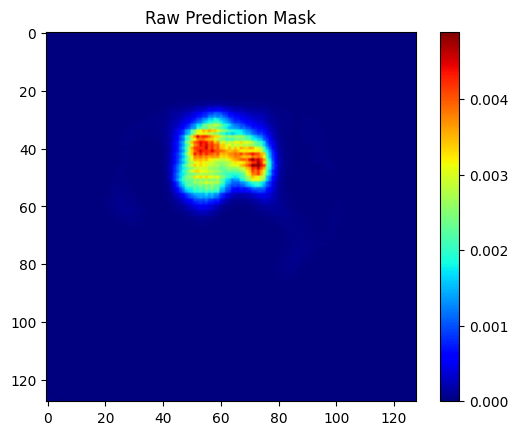

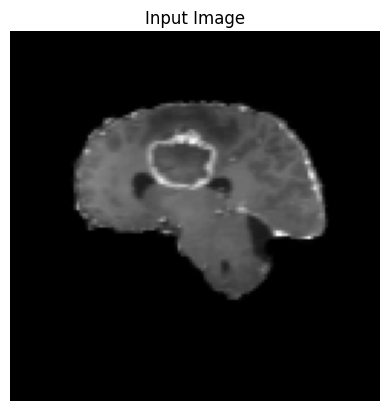

In [28]:
test_image_path = '/content/drive/MyDrive/Brain/val_images/val_1 (10).jpg'
test_image_with_path(model, test_image_path, IMG_SIZE)